In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import evosax

from typing import NamedTuple
from functools import partial
import math

In [3]:
import xylo
import xylo.types as t
import xylo.woods
import xylo.cut

import xylo.receptance as r
import xylo.sweep as xs

import xylo.loss.receptance as xlr

import xylo.tuning

In [4]:
def sweep_blank(wood, bar):
    sections = xylo.cut.none(bar)
    # sections.plot(to_scale = True)
    swp = xs.sweep(wood, bar, sections, t.sweep_default)
    print(wood)
    print(swp.harmonics)
    print("")

In [38]:
def make_bar(note, tuning = xylo.tuning.yamaha_YX500R, width = 0.040, depth = 0.019, elements = 1):
  length = tuning.note_to_length(note)
  return t.BarProps(width = width, depth = depth, length = length, elements = elements, min_depth = 0.010)

In [62]:
bar300 = make_bar(59, width = 0.038, depth = 0.019)
print(bar300)

# [1081.6 2677.8 4615. ]
sweep_blank(t.Wood.make_E_nu(E = 29.100e9, nu = 8.20, rho = 1059), bar300)

BarProps(width=0.038, depth=0.019, length=0.3, elements=1, min_depth=0.01)
Wood(rho=1059, E=29100000000.0, G=1581521739.130435, nu=8.2)
[1081.58212833 2677.9975283  4616.38080524]



In [ ]:
# xsweep(t.Wood.make_E_nu(E = 26.100e9, nu = 0.49, rho = 990))
# xsweep(t.Wood.make_E_nu(E = 26.100e9, nu = 0.49, rho = 1114))
# xsweep(t.Wood.make_E_nu(E = 23.150e9, nu = 0.49, rho = 990))
# xsweep(t.Wood.make_E_nu(E = 26.100e9, nu = 12.7, rho = 990))
# xsweep(t.Wood.make_E_nu(E = 24.500e9, nu = 6.9, rho = 990))
# xsweep19(t.Wood.make_E_nu(E = 26.100e9, nu = 0.49, rho = 1059), d = 0.0195, w = 0.040)
# xsweep19(t.Wood.make_E_nu(E = 26.100e9, nu = 0.49, rho = 1059), d = 0.0192, w = 0.038, l = 0.300)
# xsweep19(t.Wood.make_E_nu(E = 28.500e9, nu = 8.00, rho = 1059), d = 0.0192, w = 0.038, l = 0.300)
# recording 1086.6 2689.2 3689.2 4689.4
# xsweep19(t.Wood.make_E_nu(E = 28.500e9, nu = 8.00, rho = 1059), d = 0.0192, w = 0.040, l = 0.300)

# recording # 1048.  2631.6 3769.6 4577.8 5044.8
# xsweep19(t.Wood.make_E_nu(E = 24.900e9, nu = 6.60, rho = 1059), d = 0.0192, w = 0.040, l = 0.295)

# recording 2160.4 3711.8 5052.2
# xsweep19(t.Wood.make_E_nu(E = 26.100e9, nu = 6.00, rho = 1059), d = 0.0192, w = 0.038, l = 0.204)


BarProps(width=0.038, depth=0.019, length=0.3, elements=300, min_depth=0.01)
0.0 [1081.58212829 2677.9975283  4616.38080523] [1.         2.47600017 4.26817408]
0.2 [1014.75190054 2560.40249433 4622.50367033] [1.         2.52318078 4.55530427]
0.4 [ 948.44115816 2432.8962998  4567.62463734] [1.         2.5651526  4.81592832]
0.6000000000000001 [ 881.89605444 2295.44322897 4446.26990275] [1.         2.60285009 5.04171652]
0.8 [ 814.16787158 2146.65558884 4270.74870943] [1.         2.63662528 5.24553825]
1.0 [ 744.00682405 1983.32202568 4058.55807472] [1.         2.66573096 5.45500114]


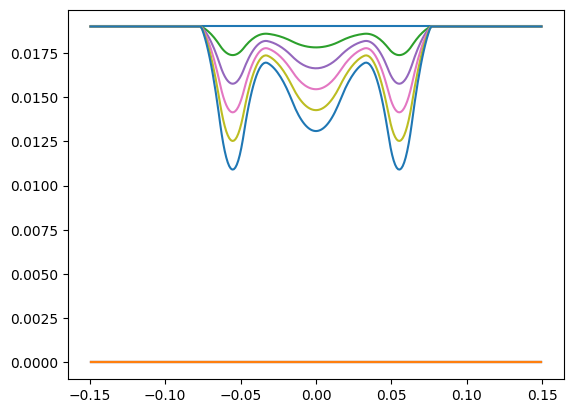

In [125]:
# spline = jnp.array([0.86181835, 0.10249491, 0.67961064, 0.68944927])
# spline = jnp.array([0.86181835, 0.10249491, 0.67961064, 0.68944927, 0.39092797])
spline = jnp.array([0.86181835, 0.10249491, 0.67961064, 0.68944927, 0.39092797, 0.73175392])
# wood = t.Wood.make_E_nu(E = 29.100e9, nu = 8.20, rho = 1059)
# wood = t.Wood.make_E_nu(E = 26.100e9, nu = 8.49, rho = 1059)
wood = t.Wood.make_E_nu(E = 29.100e9, nu = 8.20, rho = 1059)
bar = make_bar(59, width = 0.038, depth = 0.019, elements = 300)
print(bar)
for i in jnp.arange(0.0, 1.1, 0.2):
    # xi = jnp.arange(1, len(sol.value) - 1)
    # ii = jnp.minimum(xi * i, 1)

    vv = xylo.cut.spline_scale(spline, i)
    # XXX
    sections = xylo.cut.spline(bar, vv) # , max_spread=1.0)
    sections.plot(to_scale = False)

    swp = xs.sweep(wood, bar, sections, t.sweep_default)
    print(i, swp.harmonics, swp.harmonics / swp.harmonics[0])

In [ ]:
# [1081.6 1585.8 2677.8 3527.4]
# [ 999.6 1858.6 2535.6 3509.6]
# [ 928.8 1447.2 2410.4]
# [ 871.2 1346.  1801.  2276.4]
# [ 771.4 ]
# [ 688.6 1690.4 2100.4 3531. ]